# Fitting

In [1]:
import zfit
import numpy as np
import random
# create space
obs1 = zfit.Space("x", limits=(0, 10))
obs2 = zfit.Space("x", limits=(0, 10))

# parameters
mu1 = zfit.Parameter("mu1", 5., 1, 10, step_size=0)
sigma1 = zfit.Parameter("sigma1", 1., 0.1, 10, step_size=0)
lambd1 = zfit.Parameter("lambda1", -0.2, -1, -0.01, step_size=0)
frac1 = zfit.Parameter("fraction1", 0.5, 0, 1)

mu2 = zfit.Parameter("mu2", 5., step_size=0)
sigma2 = zfit.Parameter("sigma2", 1., step_size=0)
lambd2 = zfit.Parameter("lambda2", -0.2, step_size=0)
frac2 = zfit.Parameter("fraction2", 0.5, step_size=0)

# model building, pdf creation
gauss1 = zfit.pdf.Gauss(mu=mu1, sigma=sigma1, obs=obs1)
exponential1 = zfit.pdf.Exponential(lambd1, obs=obs1)
model1 = zfit.pdf.SumPDF([gauss1, exponential1], fracs=frac1)


gauss2 = zfit.pdf.Gauss(mu=mu2, sigma=sigma2, obs=obs2)
exponential2 = zfit.pdf.Exponential(lambd2, obs=obs2)
model2 = zfit.pdf.SumPDF([gauss2, exponential2], fracs=frac2)
# data
n_sample = 10000

exp_data = exponential2.sample(n=n_sample * (1 - frac2)).numpy()

gauss_data = gauss2.sample(n=n_sample * frac2).numpy()

data = model2.create_sampler(n_sample, limits=obs2)
data.resample()
# create space
import random
frac1.set_value(random.random())

# plot the data
data_np = data[:, 0].numpy()
color = 'black'
n_bins = 100

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs1.area()
prev = 0.5
x = np.linspace(0, 10, 1000)
res = []
minimizer = zfit.minimize.Minuit()
for i in range(0, 50):

    data.resample()
    frac1.set_value(prev)

    # plot the data
    data_np = data[:, 0].numpy()

    nll1 = zfit.loss.UnbinnedNLL(model=model1, data=data)

    result1 = minimizer.minimize(nll1)
    value_stat = list(result1.error().keys())[0]
    error_stat = list(result1.error().values())[0]
    frac_value = float(value_stat.value())
    frac_up_error = float(error_stat.upper)
    frac_low_error = float(error_stat.lower)
    if(frac_value - frac2.value() > 0):
        frac_error = frac_up_error
    else:
        frac_error = abs(frac_low_error)
    res.append((frac_value - frac2.value())/(frac_error))
    print(frac_value)
    prev = frac_value

C:\Users\mi\anaconda3\envs\zfit\lib\site-packages\ipykernel_launcher.py:1: UserWarning: zfit has moved from TensorFlow 1.x to 2.x, which has some profound
implications behind the scenes of zfit and minor ones on the user side.
Be sure to read the upgrade guide (can be found in the README at the top)
to have a seamless transition. If this is currently not doable you can
downgrade zfit to <0.4.
Feel free to contact us in case of problems in order to fix them ASAP.
  """Entry point for launching an IPython kernel.
C:\Users\mi\anaconda3\envs\zfit\lib\site-packages\zfit\util\execution.py:62: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=42 (42 total)      |
| EDM = 0.000516 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49639370704348706
------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.00062 (Goal: 5E-05)   |         

------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000308 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5024804119133583


------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=49 (49 total)      |
| EDM = 7.5E-07 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.502433112326497


------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.31E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5090677324962187


------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=50 (50 total)      |
| EDM = 2.33E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4982127943269188


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 9.91E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5117748872187399


------------------------------------------------------------------
| FCN = 2.069E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.01E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5019615865598953


------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=50 (50 total)      |
| EDM = 7.04E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4974767421855221


------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=48 (48 total)      |
| EDM = 7.46E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5005370171184694


------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=48 (48 total)      |
| EDM = 3.6E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5109163143674411


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000188 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5042650705439116


------------------------------------------------------------------
| FCN = 2.059E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.49E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.504010641960434


------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=50 (50 total)      |
| EDM = 3.48E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5189062994310134


------------------------------------------------------------------
| FCN = 2.064E+04               |      Ncalls=51 (51 total)      |
| EDM = 3.97E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5048383548085059


------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=50 (50 total)      |
| EDM = 9.64E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5039228161280175


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 0.000703 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49984185888672306


------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.93E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5055605239720317


------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000439 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5074426191858091


------------------------------------------------------------------
| FCN = 2.062E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000505 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5192551678210229


------------------------------------------------------------------
| FCN = 2.057E+04               |      Ncalls=51 (51 total)      |
| EDM = 1E-06 (Goal: 5E-05)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5028203321434496


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.63E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5061525353315693


------------------------------------------------------------------
| FCN = 2.072E+04               |      Ncalls=50 (50 total)      |
| EDM = 3.19E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4908292648944598


------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=50 (50 total)      |
| EDM = 0.000973 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5139384909889249


------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=51 (51 total)      |
| EDM = 1.01E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4912985045875364


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.4E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5071113784625726


------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.77E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49586789261014336


------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000471 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5170931529580369


------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=50 (50 total)      |
| EDM = 5.05E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4926523641849633


------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=50 (50 total)      |
| EDM = 5.73E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5065629792531743


------------------------------------------------------------------
| FCN = 2.053E+04               |      Ncalls=51 (51 total)      |
| EDM = 4.8E-06 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5199887617130549


------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 3.42E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.504712211844725


------------------------------------------------------------------
| FCN = 2.063E+04               |      Ncalls=49 (49 total)      |
| EDM = 7.62E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.509796726337071


------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=49 (49 total)      |
| EDM = 4.33E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4998993509226841


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.74E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5031621153651216


------------------------------------------------------------------
| FCN = 2.066E+04               |      Ncalls=49 (49 total)      |
| EDM = 7.58E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5015454824587757


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.02E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5054713896757701


------------------------------------------------------------------
| FCN = 2.067E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.46E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49830163588517173


------------------------------------------------------------------
| FCN = 2.071E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.62E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49212893209272607


------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=49 (49 total)      |
| EDM = 0.000328 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5092583227509462


------------------------------------------------------------------
| FCN = 2.065E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000945 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5011364531640883


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=48 (48 total)      |
| EDM = 1.67E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5060615759843219


------------------------------------------------------------------
| FCN = 2.061E+04               |      Ncalls=48 (48 total)      |
| EDM = 0.000553 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5162164914460973


------------------------------------------------------------------
| FCN = 2.068E+04               |      Ncalls=49 (49 total)      |
| EDM = 5.22E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.512772704494833


------------------------------------------------------------------
| FCN = 2.056E+04               |      Ncalls=49 (49 total)      |
| EDM = 1.98E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5202204538226232


------------------------------------------------------------------
| FCN = 2.074E+04               |      Ncalls=49 (49 total)      |
| EDM = 0.000369 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.49936883924710473


------------------------------------------------------------------
| FCN = 2.07E+04                |      Ncalls=49 (49 total)      |
| EDM = 5.2E-05 (Goal: 5E-05)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.4963059266533228


------------------------------------------------------------------
| FCN = 2.052E+04               |      Ncalls=49 (49 total)      |
| EDM = 2.88E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5114204585672774


(array([2., 0., 1., 1., 0., 0., 0., 0., 1., 2., 0., 1., 2., 0., 1., 2., 1.,
        1., 2., 4., 1., 1., 2., 2., 2., 1., 3., 1., 1., 0., 1., 0., 3., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 2.]),
 array([-0.97071354, -0.90883656, -0.84695958, -0.7850826 , -0.72320562,
        -0.66132863, -0.59945165, -0.53757467, -0.47569769, -0.41382071,
        -0.35194373, -0.29006675, -0.22818977, -0.16631278, -0.1044358 ,
        -0.04255882,  0.01931816,  0.08119514,  0.14307212,  0.2049491 ,
         0.26682608,  0.32870306,  0.39058005,  0.45245703,  0.51433401,
         0.57621099,  0.63808797,  0.69996495,  0.76184193,  0.82371891,
         0.8855959 ,  0.94747288,  1.00934986,  1.07122684,  1.13310382,
         1.1949808 ,  1.25685778,  1.31873476,  1.38061174,  1.44248873,
         1.50436571,  1.56624269,  1.62811967,  1.68999665,  1.75187363,
         1.81375061,  1.87562759,  1.93750457,  1.99938156,  2.06125854,
         2.12313552]),
 <a list of 1 Patch o

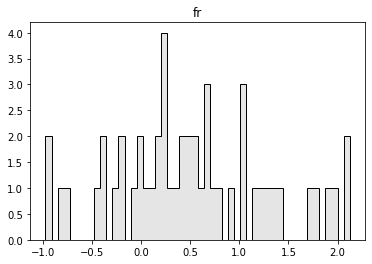

In [2]:
import matplotlib.pyplot as plt
color = 'black'
plt.figure()
plt.title("fr")
# plot the data
plt.hist(res, color=color, bins=50, histtype="stepfilled", alpha=0.1)
plt.hist(res, color=color, bins=50, histtype="step")

In [ ]:
np.mean(res)

In [ ]:
class HistPDF(zfit.pdf.BasePDF):

    def __init__(self, hist_args, hist_bins, obs, name='HistPDF'):
        self.rv_hist = scipy.stats.rv_histogram([hist_args, hist_bins])  # or something, unsure
        super().__init__(obs=obs, name=name)

    def _unnormalized_pdf(self, x):
        x = z.unstack_x(x)
        probs =  z.py_function(func=self.rv_hist.pdf, inp=[x], Tout=tf.float64)
        probs.set_shape(x.shape)
        return probs